# Bitcoin Data Analysis

In [49]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
#Reading the Dataset and storing it as a dataframe 
df = pd.read_csv(r"bitcoin_price_Training - Training.csv")
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [51]:
#Checking the column names of df
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [52]:
#Checking the shape of the dataset
df.shape

(1556, 7)

After looking at the data, it is understood that it is of time-series nature

In [53]:
#Checking the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [54]:
#Describing the data frame and transposing it for easier legibility
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


# Preprocessing the dataset

In [55]:
#Checking the data types of all features in the dataset
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [56]:
#Converting the Date from Object type to date_time type
df['Date'] = pd.to_datetime(df['Date'])

##Can also use df['Date'].astype('datetime64[ns]') to exectute the following

In [57]:
#Start date for data collection
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [58]:
#Last date for data collection
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

The following data has been collected for over 4 years

In [59]:
#Checking for missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [60]:
#Checking for duplicates
df.duplicated().sum()

0

In [61]:
#Sorting the data in ascending order i.e., earliest date to latest date of data collection
data = df.sort_index(ascending = False).reset_index()

The parameter ascending = False had to be mentioned because the original dataset was ordered from latest to oldest.
reset_index() was used to implement correct index numbers.

In [62]:
#Dropped the index column using data.drop('index', axis = 1, inplace = True)
data.head(3)

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [63]:
data.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

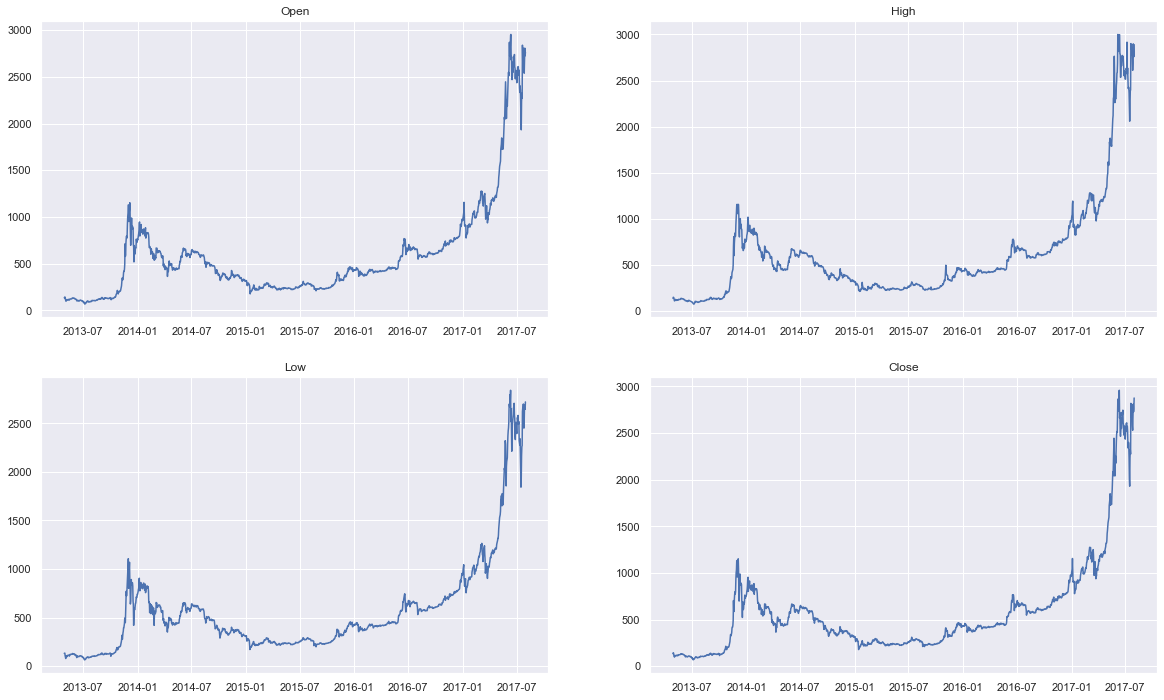

In [64]:
#Creating subplots for Open, High, Low, Close Bitcoin prices with respect to date

plt.figure(figsize = (20, 12))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

# Analysing Bitcoin Prices using Candle-stick Chart

In [65]:
#Installing necessary packages
!pip install chart_studio
!pip install plotly

In [66]:
#Importing necessary libraries
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [67]:
init_notebook_mode(connected = True)

In [68]:
trace = go.Candlestick(x = data['Date'],
              high = data['High'],
              open = data['Open'],
              close = data['Close'],
              low = data['Low'])

In [69]:
candlestick_data = [trace]
layout = {
    'title': 'Bitcoin Historical Prices',
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'Prices'}
}

In [71]:
fig = go.Figure(data = candlestick_data, layout = layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

The following Candlestick chart is interactive and can be used to check Open, High, Low and Closing prices of Bitcoin for all trading sessions from 2013-2017

# In-depth Analysis of Closing Price

<AxesSubplot:>

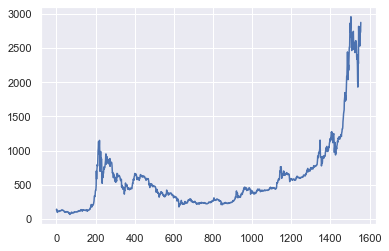

In [72]:
data['Close'].plot()

The X-axis should be Date, hence the code must be updated accordingly

In [73]:
data.set_index('Date', inplace = True)

In [74]:
data.head(3)

,index,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,1555,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,1554,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,1553,144.00,146.93,134.05,139.00,-,"1,597,780,000"


<AxesSubplot:xlabel='Date'>

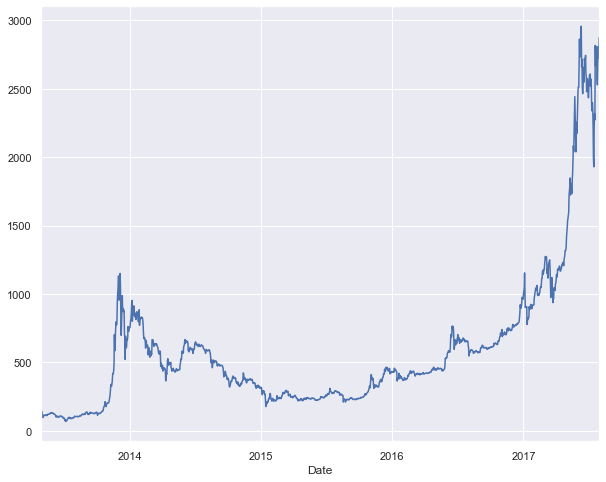

In [75]:
data['Close'].plot(figsize = (10,8))

<AxesSubplot:xlabel='Date'>

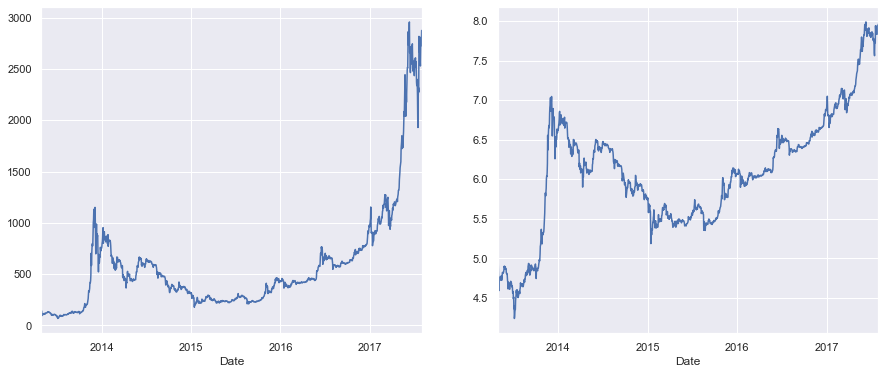

In [76]:
plt.subplot(1,2,1)
data['Close'].plot(figsize = (15,6))

plt.subplot(1,2,2)
np.log1p(data['Close']).plot(figsize = (15,6))

In [77]:
#Logarithmic Values of Closing Price
np.log1p(data['Close'])

Date
2013-04-28    4.906829
2013-04-29    4.980451
2013-04-30    4.941642
2013-05-01    4.770600
2013-05-02    4.665418
                ...   
2017-07-27    7.890874
2017-07-28    7.940943
2017-07-29    7.911122
2017-07-30    7.922326
2017-07-31    7.964274
Name: Close, Length: 1556, dtype: float64

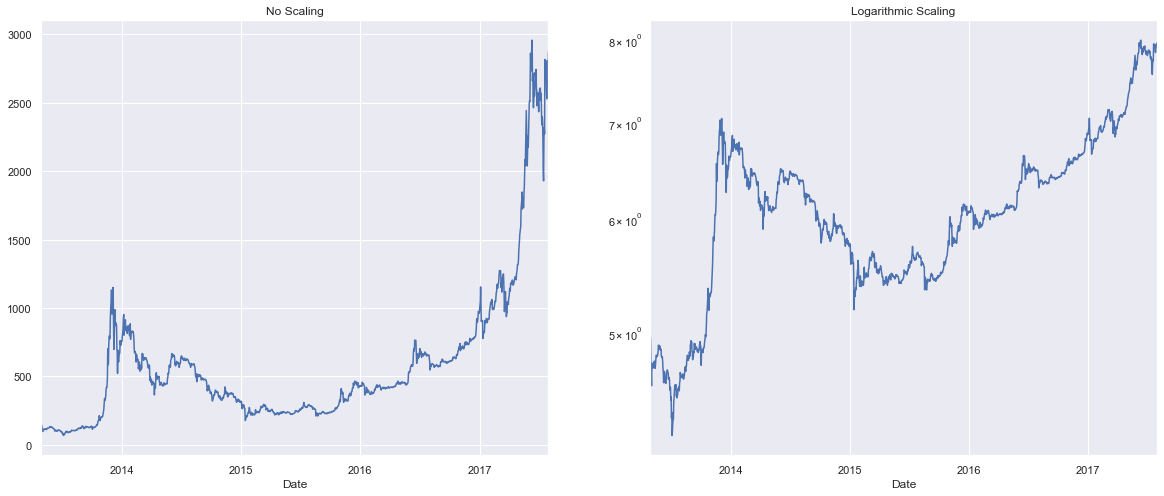

In [78]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Logarithmic Scaling')
plt.yscale('log')

# Yearly, Quarterly and Monthly Closing Price Analysis

In [79]:
data.head(3)

,index,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,1555,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,1554,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,1553,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [80]:
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

In [81]:
#Using a resample function to group prices according to Year, Quarter or Month

<AxesSubplot:title={'center':'Bitcoin Price Year-wise'}, xlabel='Date'>

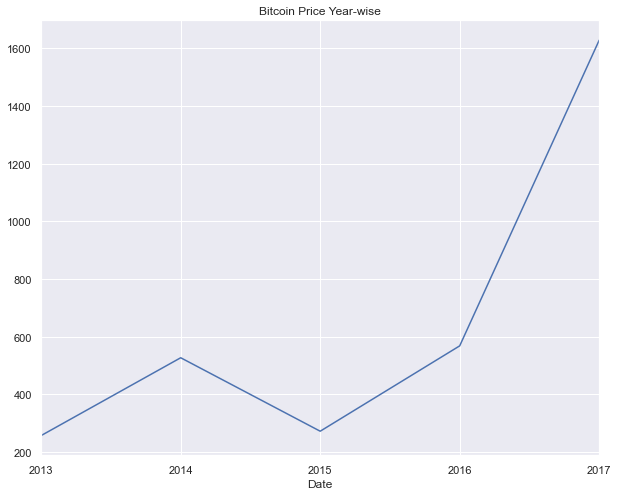

In [82]:
plt.title('Bitcoin Price Year-wise')
data['Close'].resample('Y').mean().plot(figsize = (10,8))

Line chart for Yearly average closing prices

<AxesSubplot:title={'center':'Bitcoin Quarterly Price'}, xlabel='Date'>

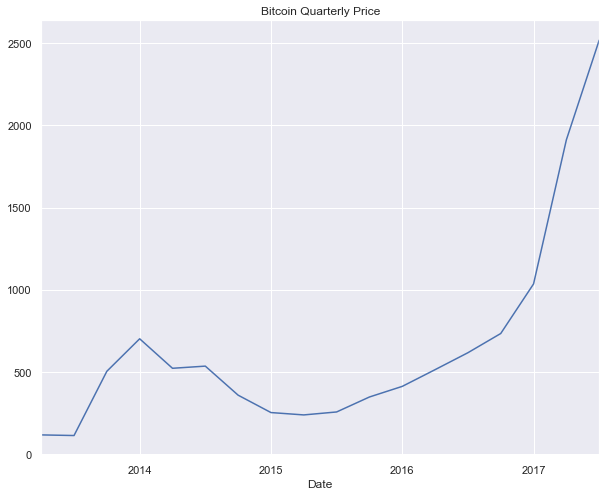

In [83]:
plt.title('Bitcoin Quarterly Price')
data['Close'].resample('Q').mean().plot(figsize = (10,8))

Line Chart for Quarterly average closing prices

<AxesSubplot:title={'center':'Bitcoin Monthly Price'}, xlabel='Date'>

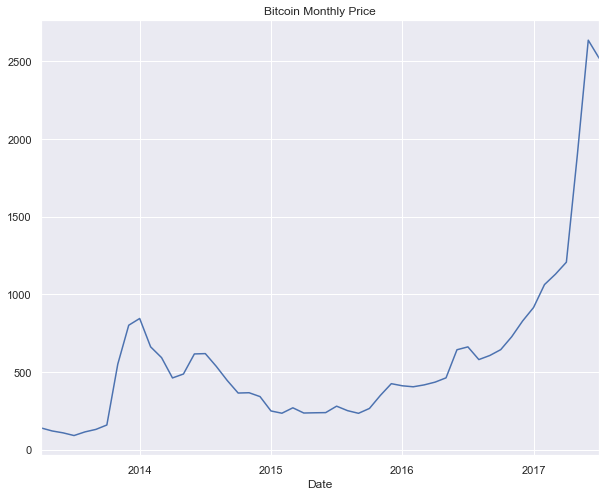

In [84]:
plt.title('Bitcoin Monthly Price')
data['Close'].resample('M').mean().plot(figsize = (10,8))

Line Chart for Monthly average closing prices

# Analysing Daily Change in Bitcoin Closing Price

In [85]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [86]:
#Calculating percentage change between current and prior element
data['Close_price_%_change'] = data['Close'].pct_change()*100

In [87]:
data['Close_price_%_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_%_change, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

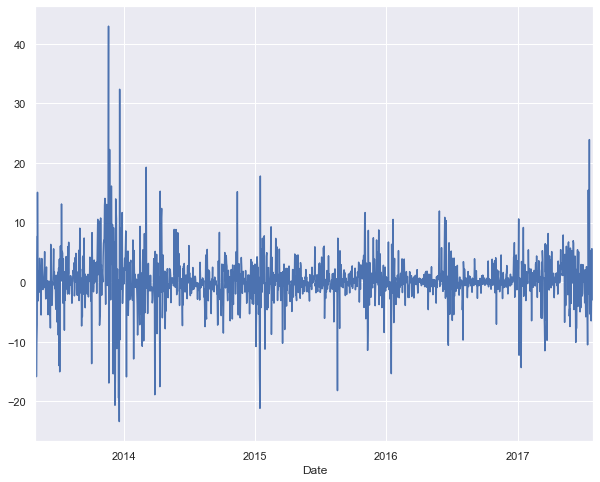

In [88]:
data['Close_price_%_change'].plot(figsize = (10,8))

In [45]:
import cufflinks as cf

In [46]:
cf.go_offline()

In [48]:
data['Close_price_%_change'].iplot(title = '% Change in Daily Price',
    xTitle = 'Timeline',
    yTitle = '% Change',)